# Mercedes-Benz Greener Manufacturing 

**DESCRIPTION**

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

**Following actions should be performed:**

- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.


In [1]:
# Import all necessary modules

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Program Files\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import training and testing data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# check the shape of the datasets
print("Train Data Shape: ",train_df.shape)
print("Test Data Shape: ",test_df.shape)

Train Data Shape:  (4209, 378)
Test Data Shape:  (4209, 377)


In [3]:
# Check the information of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
# Check the information of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
# See the train dataset
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# See the test dataset
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


**#################################################################################################################**

## 1. EDA on the Datasets

From the above information we can say
- "y" is the target variable in training dataset and it is a continues variable. So the model should be Regression.
- Both dataset has 8 catagorical variable
- "ID" column has all unique IDs as number of unique ID is same as number of rows in Train and Test dataset. So it has not statistical significance.
- Three different datatypes feature are present in Train data
    - int64 = 369
    - float64 = 1 (y)
    - object = 8
- Two different datatypes feature are present in Test Data
    - int64 = 369
    - object = 8

Now lets dig more and generate **Pandas Profiling report** to better understand the data.

In [7]:
train_prof = ProfileReport(train_df)
test_prof = ProfileReport(test_df)

train_prof.to_file("train_report.html")
test_prof.to_file("test_report.html")

**Since "y" is the targate variable lets understand "y" more.**

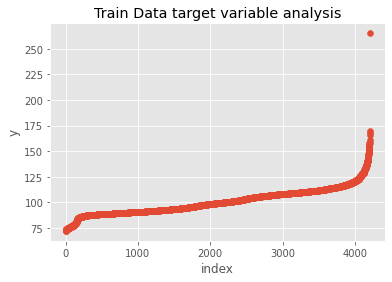

In [8]:
plt.figure(figsize=(6,4))
style.use("ggplot")
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index')
plt.ylabel('y')
plt.title("Train Data target variable analysis")
plt.show()

Seems like a single data point is well above the rest. Now let us plot the distribution graph.


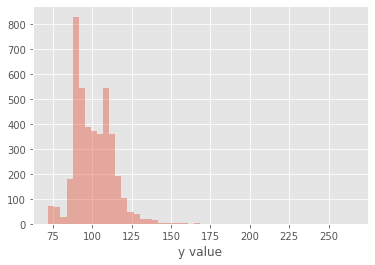

In [9]:
plt.figure(figsize=(6,4))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [10]:
train_df["y"].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

So from the above plot we can see, there is one value of "y" which is far apart from the other labels. Max value is much higher side than Q3 of target variable.


**##################################################################################################################**

## 2. Feature Engineering

### 2.1 Check how many NaN value in Train and Test dataset

In [11]:
# Check if there is NaN value is training and test data
print("Count of NaN value in Training Data:",train_df.isnull().sum().sum())
print("Count of NaN value in Testing Data:",test_df.isnull().sum().sum())

Count of NaN value in Training Data: 0
Count of NaN value in Testing Data: 0


### 2.2 Check unique values for Train and Test dataset

In [12]:
# lets check how many ID is present in Train and Test data
print("Unique ID in Train Dataset: ",len(train_df["ID"].unique()))
print("Unique ID in Test Dataset: ",len(test_df["ID"].unique()))

Unique ID in Train Dataset:  4209
Unique ID in Test Dataset:  4209


In [13]:
# Checking for no of Unique values in the features of Train and Test datset
features = train_df.drop(columns=["y"]).columns
uni_val = []
uni_var = []
nosame_uni_trainval = []
nosame_uni_testval = []
nosame_uni_var = []

for variable in features:
    if (len(train_df[variable].unique()) == len(test_df[variable].unique())):
        uni_val.append(len(train_df[variable].unique())) 
        uni_var.append(variable)
    else:
        nosame_uni_var.append(variable)
        nosame_uni_trainval.append(len(train_df[variable].unique()))
        nosame_uni_testval.append(len(test_df[variable].unique()))

#Create dataframe of features which have similar count of unique value in Train and Test data
same_unique_value = pd.DataFrame(uni_val,index=uni_var).transpose()

#Create dataframe of features which does not have similar count of unique feature in Train and Test data
notsame_unique_value = pd.DataFrame([nosame_uni_trainval,nosame_uni_testval], index=["Train","Test"],
                                    columns=nosame_uni_var)

In [14]:
same_unique_value

,ID,X1,X3,X4,X6,X8,X10,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,4209,27,7,4,12,25,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [15]:
notsame_unique_value

,X0,X2,X5,X11,X93,X107,X233,X235,X257,X258,X268,X289,X290,X293,X295,X296,X297,X330,X347,X369
Train,47,44,29,1,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,2
Test,49,45,32,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,2,1


### 2.3 Drop "ID" in Train and Test data

In [16]:
# As "ID" has no statistical significance in Train and Test both data. So it is not important. Drop it.
train_df.drop(columns=["ID"],inplace=True)

test_id = test_df["ID"].values
test_df.drop(columns=["ID"],inplace=True)


In [17]:
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


### 2.4 Label Encode catagorical feature of Train and Test data. Select X and Y feature

In [18]:
# Find the feature which has catagorical variable.
print("Catagorical Variable for Training Data:\n",train_df.dtypes[train_df.dtypes == object])
print("\nCatagorical Variable for Test Data:\n",test_df.dtypes[test_df.dtypes == object])

Catagorical Variable for Training Data:
 X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

Catagorical Variable for Test Data:
 X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object


**Both Train and Test data has the same catagorical features. Label encode the catagorical features in train and test data**

From above explanation in section 1.2 we can see
- X0,X2,X5 features doesn't have same number of unique elements
- Also X0,X2,X5 is catagorical variable, which needs to be Label Encode

So we need to concatinate Train and Test data to fit into Label Encoder

In [19]:
# Concatinate the Independent variable of Train Data and Test data for fitting in Label Encoder 
concat_df = pd.concat([train_df.drop(columns=["y"]),test_df],axis=0)


In [20]:
concat_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Encode all the catagorical variable
le = LabelEncoder()

# get the feature name columns which has object type 
obj_feature = concat_df.dtypes[concat_df.dtypes == object].index

for obj in obj_feature:
    #fit the dataset for encoding
    le.fit(concat_df[obj].astype("str"))
    
    #transform or encode the training data
    train_df[obj] = le.transform(train_df[obj].astype("str"))
    
    #transform or encode the test data except "Loan_Status"
    test_df[obj] = le.transform(test_df[obj].astype("str"))


In [22]:
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,37,23,20,0,3,27,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,37,21,22,4,3,31,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,24,24,38,2,3,30,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,24,21,38,5,3,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,24,23,38,5,3,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# Seperate the dependent and independent variable of training data
X_feature = train_df.drop(columns=["y"])
y_target = train_df["y"]

### 2.5 Column(s) which has variance is equal to zero,  remove those variable(s) from Train and Test data

**For Traing Dataset (X_feature):**

In [25]:
# Find the columns which has variance 0 in Training dataset
count =0
zero_var_features =[]
for i in X_feature.columns:
    if X_feature[i].var() ==0:
        zero_var_features.append(i)
        count+=1
print("The no. of features with Zero variance in Training Data is: ", count)
print("Features are as follows: ", zero_var_features)

The no. of features with Zero variance in Training Data is:  12
Features are as follows:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [26]:
# Drop the var = 0 columns from training data
X_feature.drop(columns=zero_var_features,inplace=True)

# check the shape of X_feature
X_feature.shape

(4209, 364)

**For Test Dataset (test_df):** Drop the same featurs in Test Data which was dropped in Train Data

In [27]:
# Drop the same features from Test Data
test_df.drop(columns=zero_var_features,inplace=True)

# check the shape of Test Data
test_df.shape

(4209, 364)

### 2.6 Find highly correlated feature in Train and Test dataset

As highly correlated feature also impact the Principle Component weight, so we should 1st remove highly correlated features. This is to avoide **Curse of Dimensionality**.

From Pandas Profile report we see that in Train and Test data, it has almost same column which is highly correlated. So we will perform same removal of highly correlated feature in Train and Test data

In [28]:
# Create Correlation matrix of train and test data
train_cor_matrix = X_feature.corr().abs()
test_cor_matrix = test_df.corr().abs()

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular. 

So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'. 

**For Train Dataset (X_feature):**

In [29]:
# Selecting Upper triangle of Train Data Corr Matrix
upper_tri = train_cor_matrix.where(np.triu(np.ones(train_cor_matrix.shape),k=1).astype(np.bool))

#Columns to drop 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)


['X35', 'X37', 'X39', 'X54', 'X61', 'X76', 'X84', 'X90', 'X94', 'X102', 'X111', 'X113', 'X119', 'X120', 'X122', 'X129', 'X130', 'X134', 'X136', 'X137', 'X140', 'X146', 'X147', 'X157', 'X158', 'X162', 'X172', 'X194', 'X198', 'X199', 'X205', 'X213', 'X214', 'X215', 'X216', 'X217', 'X222', 'X226', 'X227', 'X229', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X249', 'X250', 'X253', 'X254', 'X262', 'X263', 'X264', 'X266', 'X279', 'X296', 'X299', 'X302', 'X311', 'X314', 'X320', 'X324', 'X326', 'X328', 'X337', 'X348', 'X352', 'X358', 'X360', 'X362', 'X363', 'X364', 'X365', 'X367', 'X368', 'X370', 'X371', 'X378', 'X382', 'X385']


In [30]:
# Droping the columns which are in the list 'to_drop' from the Train Data
X_feature = X_feature.drop(columns=to_drop)

print("Shape of Train Dataset: ",X_feature.shape)
print("")
X_feature.head()

Shape of Train Dataset:  (4209, 282)



,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X372,X373,X374,X375,X376,X377,X379,X380,X383,X384
0,37,23,20,0,3,27,9,14,0,0,...,0,0,0,0,0,1,0,0,0,0
1,37,21,22,4,3,31,11,14,0,0,...,0,0,0,1,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,21,38,5,3,30,11,4,0,0,...,1,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


**For Test Dataset (test_df):** Drop the same features in Test Data

In [31]:
# Droping the columns which are in the list 'to_drop' from the Test Data
test_df.drop(columns=to_drop,inplace=True)

print("Shape of Train Dataset: ",test_df.shape)
print("")
test_df.head()

Shape of Train Dataset:  (4209, 282)



,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X372,X373,X374,X375,X376,X377,X379,X380,X383,X384
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,0,0,0,1,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,0,0,0,1,0,0,0,0,0,0


**#################################################################################################################**

## 3. Model Building

### 3.1 Perform dimensionality reduction using PCA in Train (X_feature) and Test (test_df) data

PCA works well with standardaise data. If data is normalized, all variables have the same standard deviation, thus all variables have the same weight and PCA calculates relevant axis.

In [32]:
# Normalise Train Dataset using Standard Scaler
sclr = StandardScaler()
scl_feature = X_feature.columns
for i in scl_feature:
    X_feature[i] = sclr.fit_transform(X_feature[[i]])
    
    # Normalise Test Dataset using Standard Scaler
    test_df[i] = sclr.fit_transform(test_df[[i]])

In [33]:
X_feature.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X372,X373,X374,X375,X376,X377,X379,X380,X383,X384
count,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,...,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03
mean,-1.878068e-17,-1.237151e-15,4.268912e-16,-2.304590e-16,5.653970e-16,-9.041631e-15,-7.443691e-17,7.280151e-18,1.410068e-16,-1.611235e-15,...,9.438346e-16,1.475154e-16,2.640110e-16,6.054659e-16,-3.402389e-15,-5.202143e-16,1.320457e-15,2.597510e-17,2.532095e-16,3.698633e-16
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-2.265985e+00,-1.302882e+00,-1.745588e+00,-1.678270e+00,-4.057130e+01,-1.602430e+00,-2.333970e+00,-1.650025e+00,-1.161216e-01,-2.849058e-01,...,-2.180363e-02,-1.400789e-01,-5.424762e-01,-6.841675e-01,-2.464465e-01,-6.778137e-01,-9.795217e-02,-9.024252e-02,-4.081511e-02,-2.180363e-02
25%,-7.516313e-01,-9.511815e-01,-8.015181e-01,-5.286503e-01,2.893816e-02,-1.035044e+00,-2.767985e-01,-9.394998e-01,-1.161216e-01,-2.849058e-01,...,-2.180363e-02,-1.400789e-01,-5.424762e-01,-6.841675e-01,-2.464465e-01,-6.778137e-01,-9.795217e-02,-9.024252e-02,-4.081511e-02,-2.180363e-02
50%,3.676735e-01,2.211532e-01,-1.149220e-01,-5.286503e-01,2.893816e-02,2.132044e-01,6.606344e-02,-8.687006e-02,-1.161216e-01,-2.849058e-01,...,-2.180363e-02,-1.400789e-01,-5.424762e-01,-6.841675e-01,-2.464465e-01,-6.778137e-01,-9.795217e-02,-9.024252e-02,-4.081511e-02,-2.180363e-02
75%,9.602466e-01,1.041787e+00,7.433230e-01,1.195779e+00,2.893816e-02,8.940673e-01,7.517872e-01,9.078647e-01,-1.161216e-01,-2.849058e-01,...,-2.180363e-02,-1.400789e-01,-5.424762e-01,1.461630e+00,-2.464465e-01,1.475332e+00,-9.795217e-02,-9.024252e-02,-4.081511e-02,-2.180363e-02
max,1.157771e+00,1.745188e+00,2.459813e+00,1.770589e+00,2.893816e-02,1.801885e+00,1.437511e+00,1.760494e+00,8.611662e+00,3.509932e+00,...,4.586393e+01,7.138835e+00,1.843399e+00,1.461630e+00,4.057675e+00,1.475332e+00,1.020906e+01,1.108125e+01,2.450073e+01,4.586393e+01


**Split the Train data into train and test(validation)** ==> (75%,25%)

In [34]:
X_train,X_valid,y_train,y_valid = train_test_split(X_feature,y_target,test_size = 0.25,random_state = 4242)

**PCA for Train Data (X_feature):**

In [35]:
# PCA estimatore with 6 component
pca = PCA(n_components=6, random_state=4242)

#generate principle component for X_train and X_test
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
print("PCA variance ratio (Eigan Values of PCs):",pca.explained_variance_ratio_)
print("Shape of PCA training set: ",X_train_pca.shape)
print("Shape of PCA validation set: ",X_valid_pca.shape)

PCA variance ratio (Eigan Values of PCs): [0.05650912 0.04809006 0.03741843 0.03411484 0.03021854 0.02590699]
Shape of PCA training set:  (3156, 6)
Shape of PCA validation set:  (1053, 6)


**PCA for Test Data(test_df):**

In [36]:
test_pca = pca.fit_transform(test_df)
print("PCA variance ratio (Eigan Values of PCs):",pca.explained_variance_ratio_)
print("Shape of PCA training set: ",test_pca.shape)

PCA variance ratio (Eigan Values of PCs): [0.05730094 0.05002001 0.03748021 0.03526887 0.02916424 0.02518389]
Shape of PCA training set:  (4209, 6)


### 3.2 Build XGBoost model

In [37]:
# For efficient use of the XGBoost algo, we need to convert the dataset into the DMatrix format.
# DMatrix is a unique datastructure for xgboost algo
D_train = xgb.DMatrix(X_train_pca, label = y_train)
D_valid = xgb.DMatrix(X_valid_pca, label = y_valid)

D_test = xgb.DMatrix(test_pca)

In [38]:
#Select the parameter of XGBoost model
xgb_params  = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective' : 'reg:linear'    
}


def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(D_train, 'train'), (D_valid, 'valid')]

xgb_clf = xgb.train(xgb_params, D_train,1000, watchlist, early_stopping_rounds=50,feval=xgb_r2_score, 
                maximize=True, verbose_eval=10)

[22:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:96.16547	valid-rmse:95.45710	train-r2:-54.68744	valid-r2:-62.08235
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:58.34996	valid-rmse:57.64950	train-r2:-19.50218	valid-r2:-22.00819
[20]	train-rmse:36.02330	valid-rmse:35.19609	train-r2:-6.81422	valid-r2:-7.57591
[30]	train-rmse:23.19320	valid-rmse:22.24227	train-r2:-2.23922	valid-r2:-2.42491
[40]	train-rmse:15.99083	valid-rmse:15.00357	train-r2:-0.53979	valid-r2:-0.55841
[50]	train-rmse:12.32525	valid-rmse:11.35842	train-r2:0.08523	valid-r2:0.10684
[60]	train-rmse:10.48743	valid-rmse:9.72526	train-r2:0.33770	valid-r2:0.34522
[70]	train-rmse:9.61243	valid-rmse:9.06042	train-r2:0.44360	valid-r2:0.43169
[80]	train-rmse:9.18411	valid-rmse:8.827

### 3.3 Predict Test Dataset value

In [39]:
p_test = xgb_clf.predict(D_test)

#Create a dataframe with "ID" and Predicted value of Test Data
pred_df = pd.DataFrame()
pred_df['ID'] = test_id
pred_df['y'] = p_test

pred_df.head()

,ID,y
0,1,79.228691
1,2,92.149147
2,3,87.848778
3,4,77.411400
4,5,107.622673


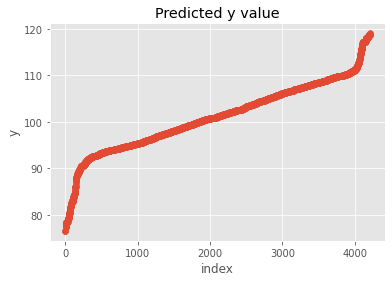

In [44]:
# Print the predicted "y" labels.

plt.figure(figsize=(6,4))
style.use("ggplot")
plt.scatter(range(pred_df.shape[0]), np.sort(pred_df.y.values))
plt.xlabel('index')
plt.ylabel('y')
plt.title("Predicted y value")
plt.show()

**########################################### End of Project #################################################**